In [4]:
# Import OpenCV for computer vision tasks
# Import Dlib 
import cv2 as cv
import dlib
import matplotlib.pyplot as plt
#import copy
import numpy as np

In [2]:
# Show an image in a popup window with a BGR numpy array as input using OpenCV
def cv_show_img_popup(img, title="Image"):
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyWindow(title)

In [3]:
# Show image inline with a BGR numpy array as input using PyPlot
def show_img_inline(images, images_per_row):
    num_images = len(images)
    images_per_row = min(images_per_row, num_images)
    num_rows = int(np.ceil(num_images / images_per_row))
    
    fig, axs = plt.subplots(num_rows, images_per_row, figsize=(12, 8))  # Adjust the figsize as needed
    
    axs = np.reshape(np.array(axs), num_images)
    
    for i in range(num_rows):
        for j in range(images_per_row):
            index = i * images_per_row + j
            ax = axs[index]
            ax.axis('off')
            image = cv.cvtColor(images[index], cv.COLOR_BGR2RGB)
            ax.imshow(image)
    
    plt.subplots_adjust(wspace=0.025, hspace=0.05)  # Adjust the spacing between images
    plt.show()

In [7]:
bill_color = cv.imread("images/bill.png") # Let's load a sample image
bill_gray = cv.cvtColor(bill_color, cv.COLOR_BGR2GRAY) # Convert image to grayscale

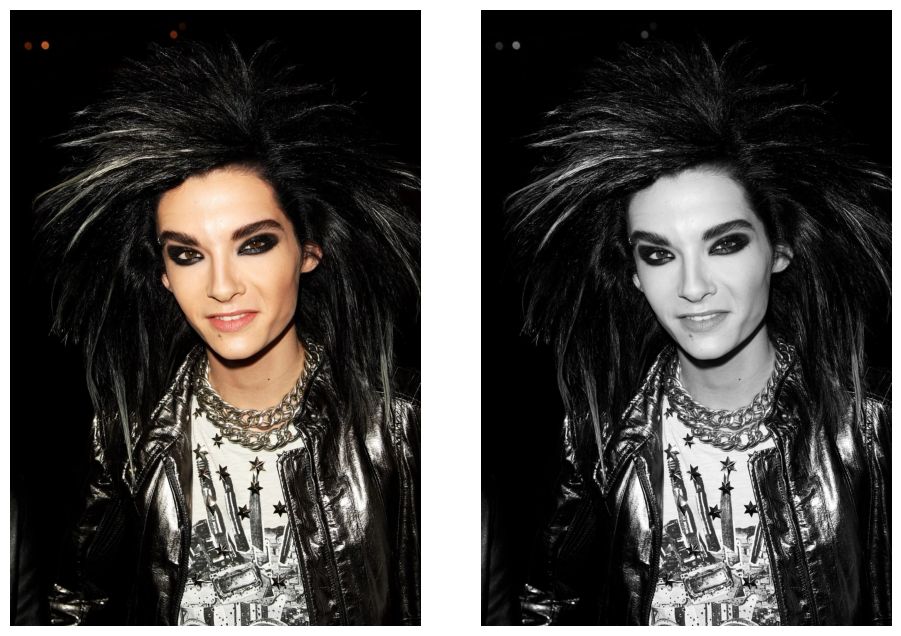

In [5]:
show_img_inline([bill_color, bill_gray], 2)

In [5]:
detector = dlib.get_frontal_face_detector() # Let's create a face detector using Dlib

In [8]:
face_box_bill = detector(bill_gray, 1) # Let's have the detector find the face bounding box in the grayscale picture

In [15]:
print(face_box_bill)
print(type(face_box_bill))

rectangles[[(241, 348) (562, 669)]]
<class '_dlib_pybind11.rectangles'>


In [12]:
two_color = cv.imread("images/two.jpg") # Let's try with two people in the picture
two_gray = cv.cvtColor(two_color, cv.COLOR_BGR2GRAY) # Convert image to grayscale

In [13]:
face_box_two = detector(two_gray, 2)

In [11]:
print(face_box_two)

rectangles[[(429, 145) (540, 256)], [(202, 193) (295, 286)]]


The detector found two faces as we can tell by the number of rectangles in the array

In [39]:
# Shapes produced by the detector to numpy array with coordinates
def rect_to_ndarray(shape, length):
    coords = np.zeros((length, 2), dtype="int")
    for i in range(0, length):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords

In [37]:
# model created by Davis King () from the 300-W dataset
predictor = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')

In [43]:
def dlib_landmarks(modelPredictor, detectedRectangles, originalImage, grayImage, RGB=(0, 0, 255)):
    withLandmarks = originalImage.copy()
    for (i, rectangle) in enumerate(detectedRectangles):
        faceboxes = modelPredictor(grayImage, rectangle)
        print(faceboxes)
        print(type(faceboxes))
        landmarks = rect_to_ndarray(faceboxes, 68)
        
        for (x, y) in landmarks:
            cv.circle(withLandmarks, (x, y), 2, RGB, -1)
    return withLandmarks

In [44]:
bill_landmarks = dlib_landmarks(predictor, face_box_bill, bill_color, bill_gray, (0, 0, 255))

<class '_dlib_pybind11.full_object_detection'>


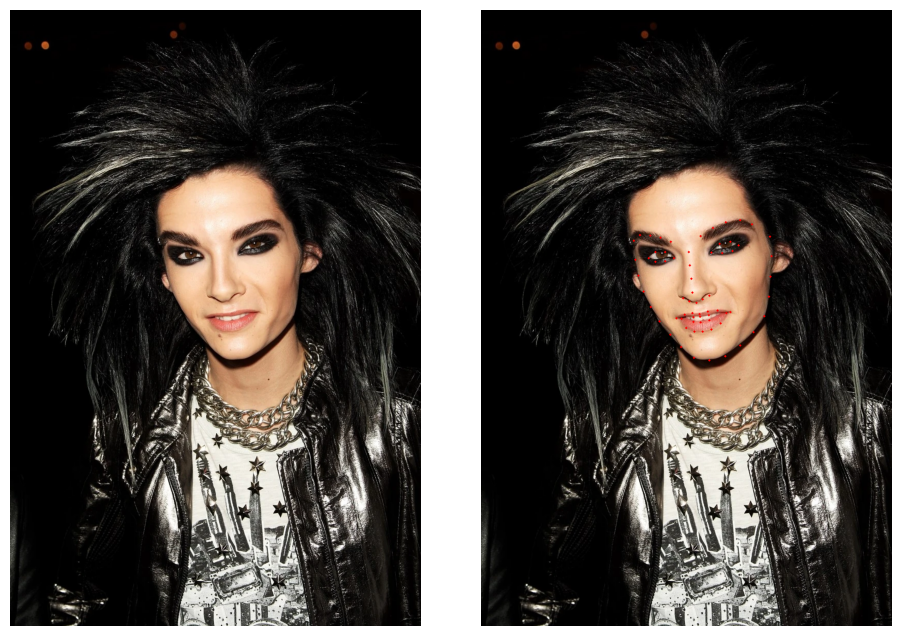

In [16]:
show_img_inline([bill_color, bill_landmarks], 2)

In [17]:
two_landmarks = dlib_landmarks(predictor, face_box_two, two_color, two_gray, (0, 0, 255))

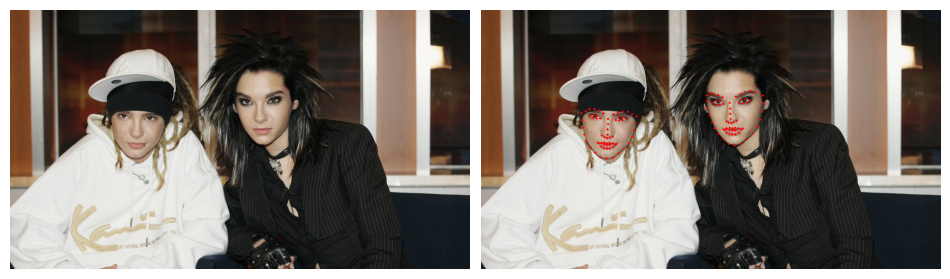

In [18]:
show_img_inline([two_color, two_landmarks], 2)

In [19]:
# Alternative methods of showing pictures

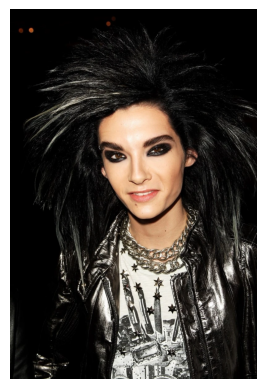

In [20]:
bill2 = cv.imread("images/bill.png")
image_rgb = cv.cvtColor(bill2, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [21]:
from IPython.display import display
from PIL import Image

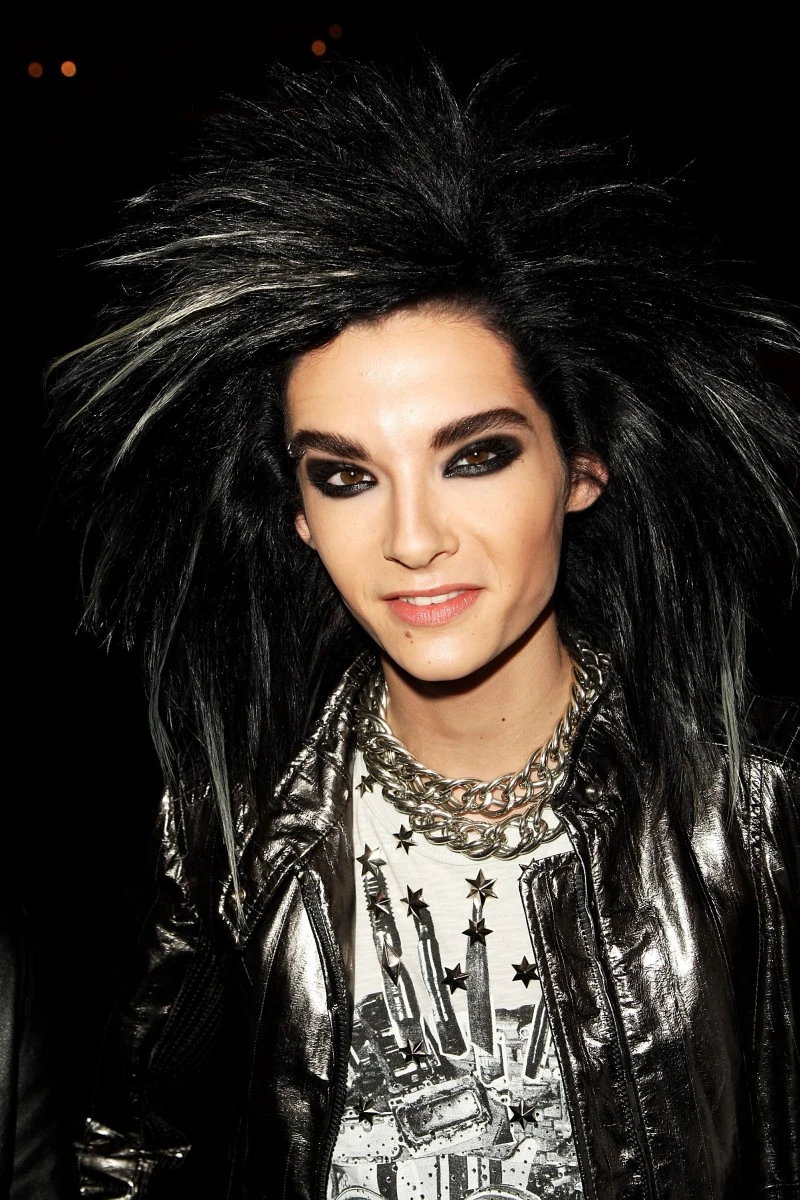

In [22]:
bill3 = Image.open("images/bill.png").convert('RGB')
display(bill3)